# displot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.displot()` (distribution plot) позволяет создавать различные виды графиков распределения, такие как гистограммы, KDE-плотности и ECDF, а также поддерживает возможность разделения на подграфики для отображения данных по подгруппам.

Основные параметры функции `sns.displot()`:

- `data`: DataFrame или массив, содержащий данные для визуализации;
- `x, y`: имена столбцов для построения графиков по осям X и Y;
- `hue`: столбец для группировки данных по цвету;
- `col, row`: столбцы для создания подграфиков;
- `kind`: тип графика ('hist' для гистограммы, 'kde' для KDE-плотности, 'ecdf' для ECDF);
- `rug`: добавляет штрих-диаграмму (по умолчанию - False);
- `bins`: количество или границы бинов для гистограммы;
- `binwidth`: ширина каждого бина;
- `palette`: палитра цветов для группировки по hue;
- `kde`: логическое значение для добавления KDE-плотности к гистограмме;
- `stat`: статистика для оси Y ('count', 'density', 'probability', 'frequency', 'percent').

Рассматривать работу функции `sns.displot()` будем на примере датасета о чаевых, оставленных в ресторане. Загрузим этот датасет:

In [3]:
tips = sns.load_dataset('tips')
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Датафрейм содержит следующую информацию:
- `total_bill`: общая сумма счета;
- `tip`: сумма чаевых;
- `sex`: пол посетителя;
- `smoker`: курящий или нет;
- `day`: день недели;
- `time`: время посещения ресторана (обед или ужин);
- `size`: количество людей за столиком.

Сделаем стиль отображения графиков белым без сетки:

In [5]:
sns.set_style('white')

Построим график распределения общей суммы счета с параметрами по умолчанию:

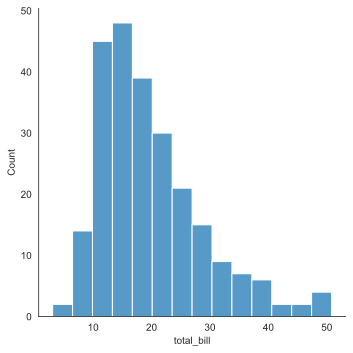

In [6]:
sns.displot(x='total_bill', data=tips)
plt.show()

По умолчанию, функция `sns.displot()` строит гистограмму, а также удаляет верхнюю и правую рамки графика. Если мы добавим координатную сетку, то рамки всё равно не появятся:

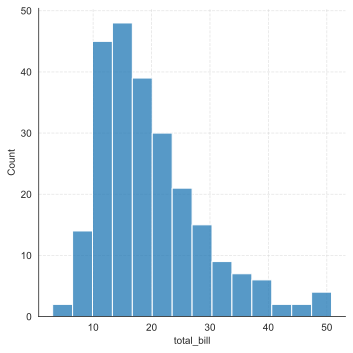

In [7]:
sns.displot(x='total_bill', data=tips)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр bins**

Как и `sns.histplot()`, функция `sns.displot()` тоже имеет в своём арсенале параметр `bins`, управляющий количеством бинов на гистограмме или их границами. Например, увеличим количество бинов на нашей диаграмме:

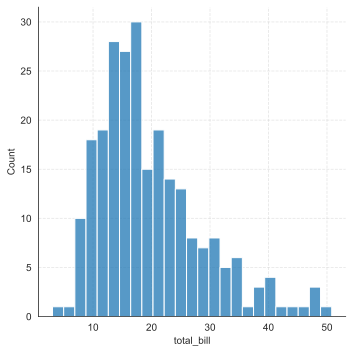

In [8]:
sns.displot(x='total_bill', data=tips, 
            bins=25)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр kde**

Передав значение `True` параметру `kde`, мы можем добавить график ядерной оценки плотности на гистограмму:

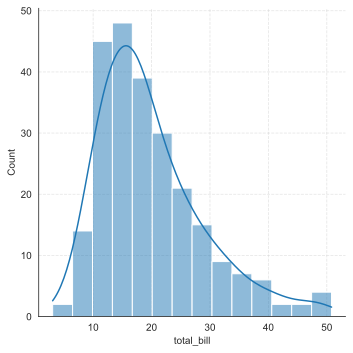

In [9]:
sns.displot(x='total_bill', data=tips,
            kde=True)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр stat**

Параметром `stat` можно изменять статистику, отображаемую по оси `Y`. Например, отложим по оси ординат вероятность:

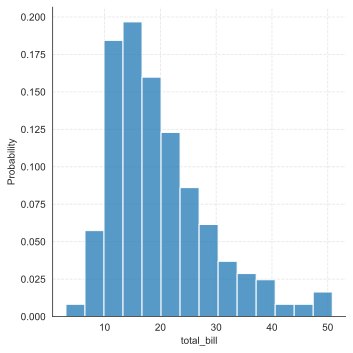

In [10]:
sns.displot(x='total_bill', data=tips,
            stat='probability')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр kind**

Параметр `kind` функции `sns.displot()` может принимать три значения: 
- `'hist'` (по умолчанию),
- `'kde'`,
- `'ecdf'`.

Построим график ядерной оценки плотности:

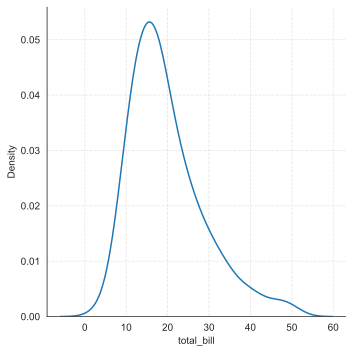

In [11]:
sns.displot(x='total_bill', data=tips,
            kind='kde')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

Параметрами `fill` и `linewidth`, закрасим область под графиком и сделаем толщину линии пошире, а также параметром `color` поменяем цвет диаграммы:

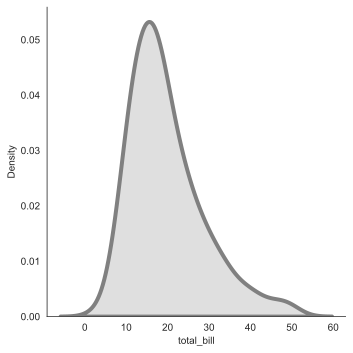

In [12]:
sns.displot(x='total_bill', data=tips, 
            kind='kde',
            fill=True,
            linewidth=4,
            color='gray')
plt.show()

Также функция `sns.displot()` предоставляет возможность строить графики `ECDF`:

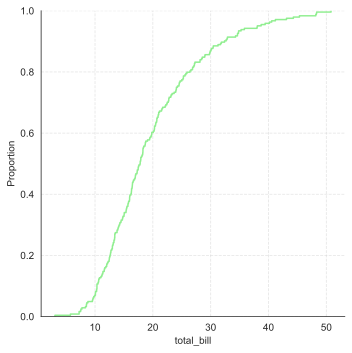

In [13]:
sns.displot(x='total_bill', data=tips,
            color='lightgreen',
            kind='ecdf')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр rug**

Параметр `rug` позволяет нанести на график штрих-диаграмму. Это вид графического представления данных, который отображает распределение данных вдоль оси.

Штрих-диаграмма отображает каждую точку данных как маленький штрих (полоску) вдоль оси, обычно горизонтальной (если данные представлены по оси `X`) или вертикальной (если данные представлены по оси `Y`). Это простой способ визуализации всех данных в наборе, который помогает увидеть распределение и плотность данных.

Добавим штрих-диаграмму к графику `KDE`, присвоив параметру `rug` значение `True`:

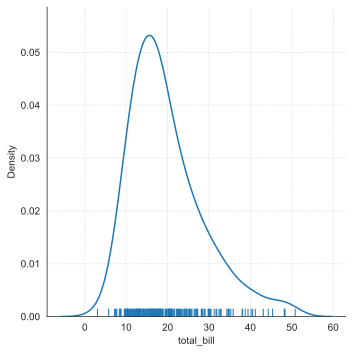

In [14]:
sns.displot(x='total_bill', data=tips,
            kind='kde', 
            rug=True)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

На графике появилась штрих-линия, по внешнему виду которой можно определить структуру распределения данных.

Если потребуется увеличить высоту штрих-диаграммы, то для этого параметру `rug_kws` нужно передать словарь, в котором ключу `'height'` следует присвоить определенное числовое значение. Например:

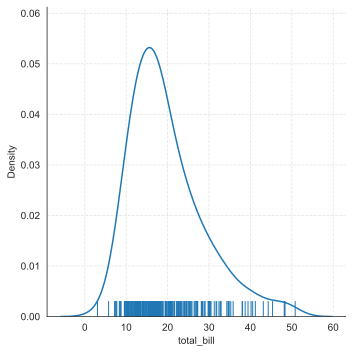

In [15]:
sns.displot(x='total_bill', data=tips, 
            kind='kde',
            rug=True,
            rug_kws={'height': 0.05})

plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Параметр hue**

Построим гистограмму распределения оплаты в зависимости от времени посещения ресторана:

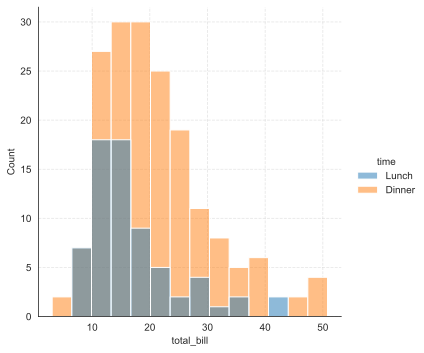

In [16]:
sns.displot(x='total_bill', data=tips,
            hue='time')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

У функции `sns.displot()`, как и у `sns.histplot()`, имеется параметр `multiple`, с помощью которого можно варьировать расположение бинов относительно друг друга.

Для примера применим атрибут `'stack'`:

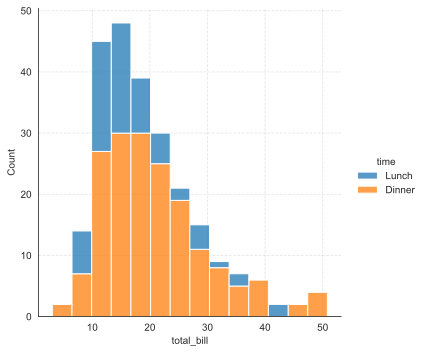

In [17]:
sns.displot(x='total_bill', data=tips,
            hue='time',
            multiple='stack')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

Теперь столбцы, относящиеся к разному времени посещения ресторана, не перекрывают друг друга.

С параметром `hue` можно строить не только гистограммы, но и графики KDE и ECDF. Для примера построим график ядерной оценки плотности:

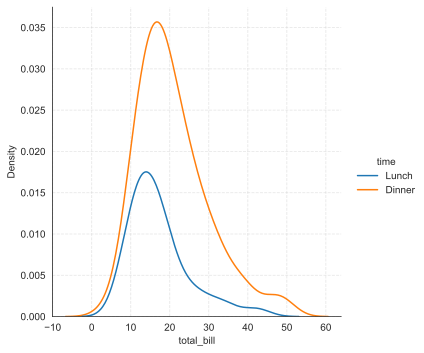

In [18]:
sns.displot(x='total_bill', data=tips,
            hue='time',
            kind='kde')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

На этом графике можно заметить, что линии KDE по оси абсцисс уходят в минусовые значения. Для того, чтобы диаграммы KDE начинались от первого значения и заканчивались на последнем значении, параметру `cut` следует присвоить значение `0`:

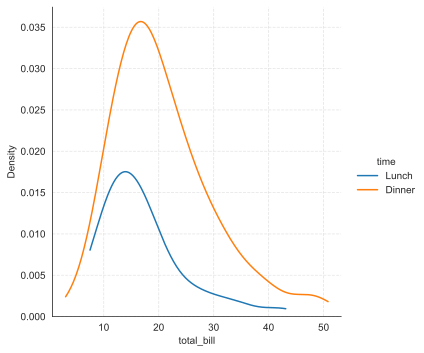

In [19]:
sns.displot(x='total_bill', data=tips,
            hue='time',
            kind='kde',
            cut=0)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

Теперь счета за оплату обедов с "отрицательными" значениями не будут сбивать с толку неискушённого зрителя.



**Параметры col и row**

Параметры `col` и `row` используются для создания многопанельных графиков, где данные разделены на группы и отображаются в отдельных подграфиках в зависимости от значений указанных категориальных переменных.
- `col`: определяет, по какой переменной будут создаваться столбцы в сетке подграфиков. Каждое уникальное значение переменной будет отображено в отдельном столбце.
- `row`: определяет, по какой переменной будут создаваться строки в сетке подграфиков. Каждое уникальное значение переменной будет отображено в отдельной строке.

Пример применения параметра `col`:

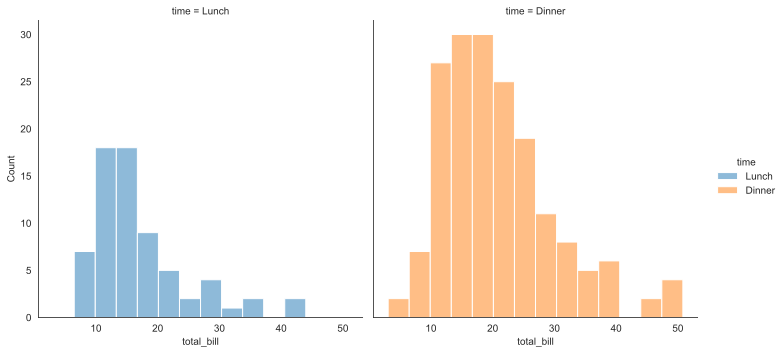

In [20]:
sns.displot(x='total_bill', data=tips, 
            hue='time',
            col='time')
plt.show()

В данном примере разделение на подграфики произошло по столбцу `'time'`.

Если построить график без параметра `hue`, то диаграмма получится однотонной:

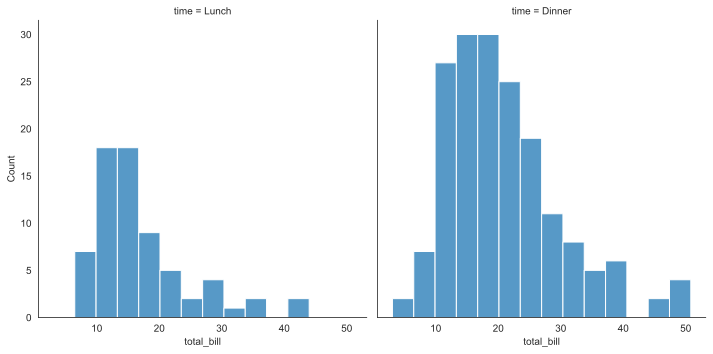

In [21]:
sns.displot(x='total_bill', data=tips,
            col='time')
plt.show()

Теперь рассмотрим пример применения параметра `row`:

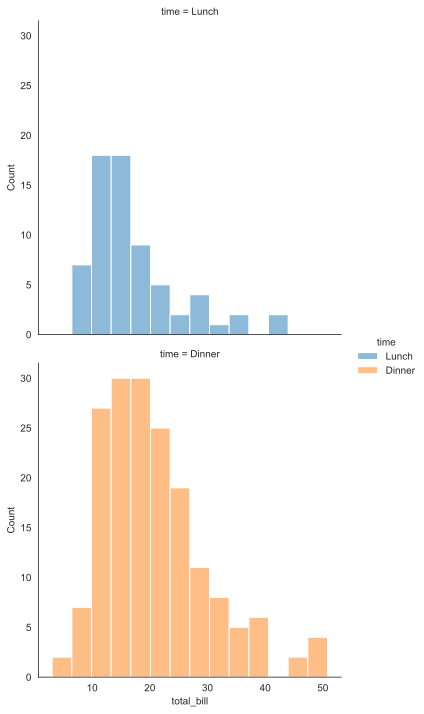

In [22]:
sns.displot(x='total_bill', data=tips, 
            hue='time',
            row='time')
plt.show()

В данном случае, подграфики имеют вертикальное расположение.

Ещё удобство применения параметров `col` и `row` заключается в том, что их можно комбинировать друг с другом. Например, сделаем горизонтальную разбивку по времени посещения ресторана (`col='time'`), а вертикальную - по полу клиента, оплатившего счёт (`row='sex'`):

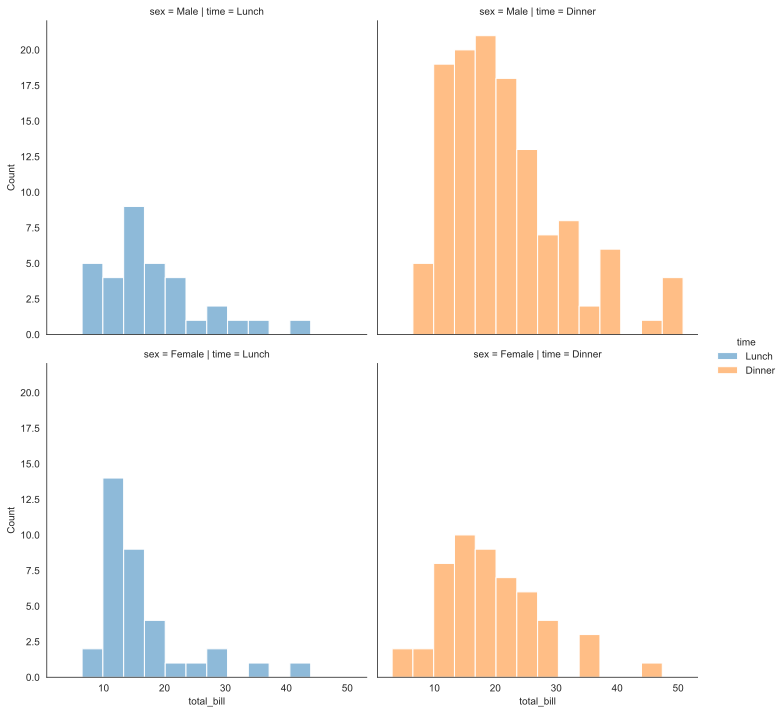

In [23]:
sns.displot(x='total_bill', data=tips, 
            hue='time',
            col='time',
            row='sex')
plt.show()

Параметром `palette` вы можете менять цветовую гамму. Например, применим палитру `'spring'`:

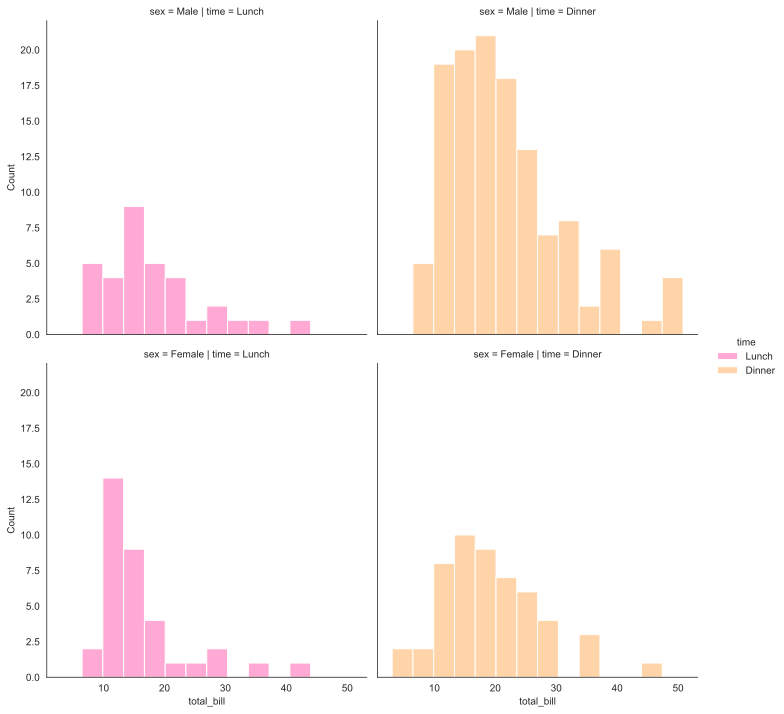

In [24]:
sns.displot(x='total_bill', data=tips, 
            hue='time',
            col='time',
            row='sex',
            palette='spring')
plt.show()

Если необходимо, чтобы не удалялись верхняя и правая границы подграфиков, то используйте параметр `facet_kws`, которому нужно передать словарь с ключом `{'despine': False}`:

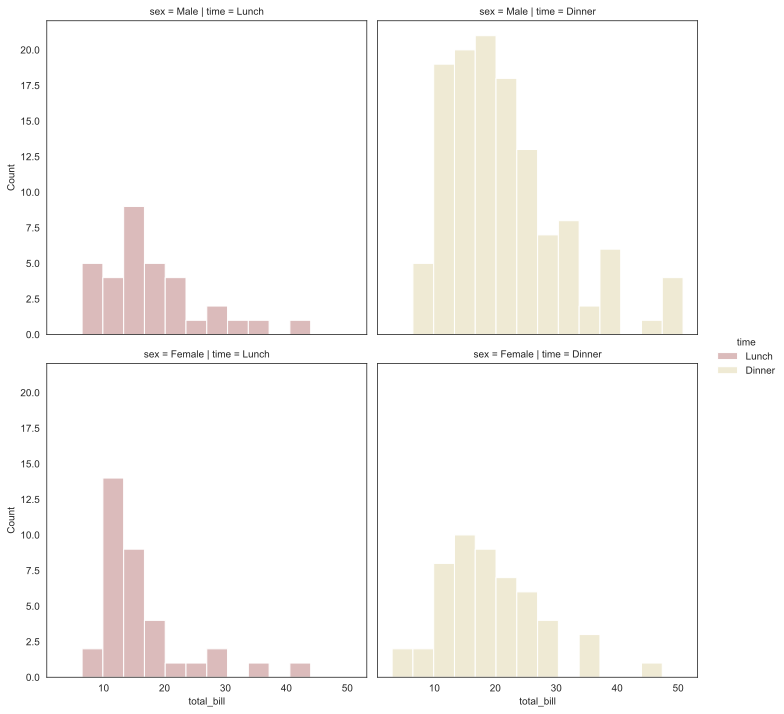

In [25]:
sns.displot(x='total_bill', data=tips, 
            hue='time',
            col='time',
            row='sex',
            palette='pink',
            facet_kws={'despine': False})
plt.show()

**Параметры height и aspect**

Параметры `height` и `aspect` функции `sns.displot()` используются для настройки размера подграфиков.
- Параметр `height` определяет высоту каждого подграфика в дюймах (по умолчанию `height=5`).
- Параметр `aspect` определяет соотношение сторон подграфиков, т.е. отношение ширины к высоте (по умолчанию `aspect=1`).

Пример использования параметра `height`:

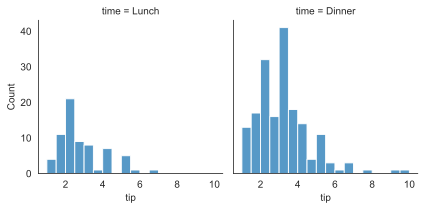

In [26]:
sns.displot(x='tip', data=tips, 
            col='time',
            height=3)
plt.show()

Пример использования параметра `aspect`:

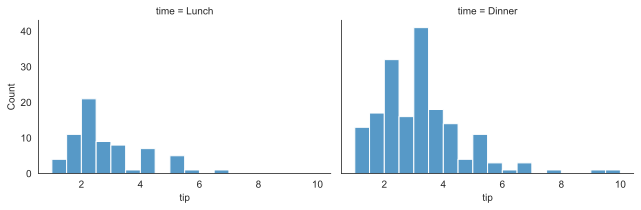

In [27]:
sns.displot(x='tip', data=tips, 
            col='time',
            height=3,
            aspect=1.5)
plt.show()

Завершая рассмотрение функции `sns.displot()`, обсудим возможность одновременной передачи переменных обеим осям диаграммы. Для примера по оси абсцисс отложим размер счёта, а по оси ординат - пол клиента, оплатившего этот счёт:

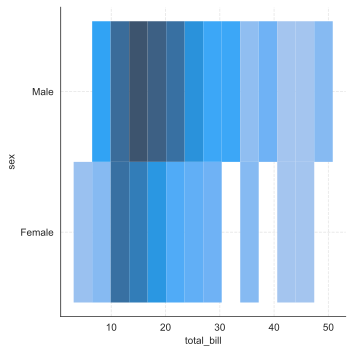

In [28]:
sns.displot(x='total_bill', y='sex', data=tips)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

Или, например, посмотрим на распределение величины счёта в зависимости от количества человек за столиком:

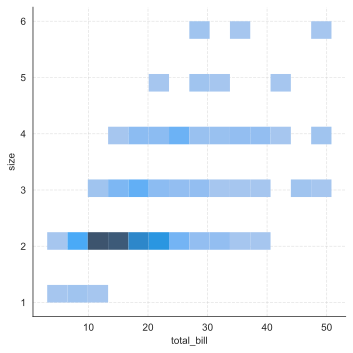

In [29]:
sns.displot(x='total_bill', y='size', data=tips)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

И добавим шкалу на этот график (`cbar=True`):

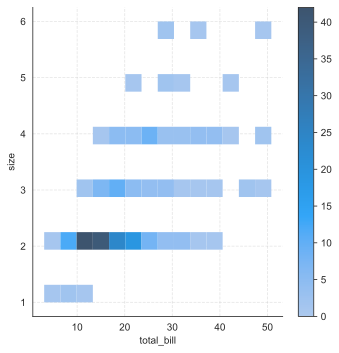

In [30]:
sns.displot(x='total_bill', y='size', data=tips, 
            cbar=True)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

Глядя на эту диаграмму, можно сделать следующие выводы:
1. С увеличением количество гостей за столиком, растёт и величина счёта (что логично).
2. Самое частое количество гостей за одним столиком - это 2 человека.
3. Наиболее часто размер счёта находится в диапазоне 5-25 долларов.

И в завершение посмотрим как будет выглядеть эта же диаграмма в виде ядерной оценки плотности:

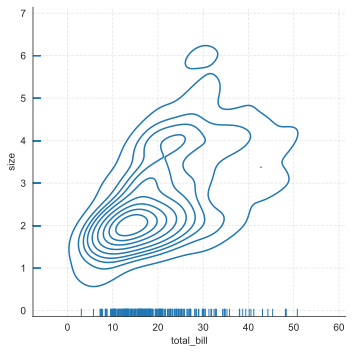

In [31]:
sns.displot(x='total_bill', y='size', data=tips, 
            kind='kde',
            rug=True)

plt.grid(linestyle='--', alpha=0.5)
plt.show()